In [12]:
# url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

# Performing Exploratory Data Analysis (EDA) on Real World Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind, chi2_contingency


In [13]:
# load The Dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

In [14]:
#Inspect the Data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [15]:
contigency_table = pd.crosstab(df["smoker"], df["time"])

# Perform Chi2 test
chi2, p, dof, expected = chi2_contingency(contigency_table)
print("Chi-Square Stats: ", chi2)
print("P-Value: ", p)

Chi-Square Stats:  0.5053733928754354
P-Value:  0.4771485672079724


In [16]:
# Interpret Results 
alpha = 0.05
if p <= alpha:
    print("Reject null Hypothesis: Variables are Dependent")
else:
    print("Fail to reject null Hypothesis: Variables are independent")

Fail to reject null Hypothesis: Variables are independent


In [17]:
# Performing T-test 
# Seperate Data by gender
male_tips = df[df["sex"] == "Male"]["tip"]
female_tips = df[df["sex"] == "Female"]["tip"]

In [18]:
# Perform my T test
t_stat, p_value = ttest_ind(male_tips, female_tips)

print("T-Statistics: ", t_stat)
print("P-Value: ", p_value)


T-Statistics:  1.387859705421269
P-Value:  0.16645623503456755


In [19]:
# Interpret Results
alpha = 0.05
if p_value <= alpha:
    print("Reject null Hypothesis: Significant Difference")
else:
    print("Fail to reject null Hypothesis: No significant difference")

Fail to reject null Hypothesis: No significant difference


In [20]:
# Apply Linear Regression Model
# Define Variables
x = df["total_bill"].values.reshape(-1, 1)
y = df["tip"].values

In [21]:
# Fit the Model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [22]:
# Output coefficinet
print("Slope: ", model.coef_[0])
print("Intercept: ", model.intercept_)
print("R-Squared: ", model.score(x, y))

Slope:  0.10502451738435337
Intercept:  0.9202696135546731
R-Squared:  0.45661658635167657


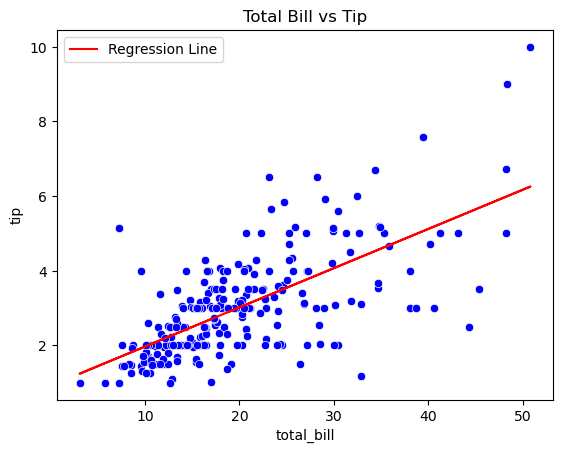

In [23]:
# Plot regression
sns.scatterplot(x=df["total_bill"], y=df["tip"], color="blue")
plt.plot(df["total_bill"], model.predict(x), color="red", label="Regression Line")
plt.title("Total Bill vs Tip")
plt.legend()
plt.show()

In [24]:
# Delete the Categorical Data 
del df["sex"]
del df["smoker"]
del df["time"]
del df["day"]

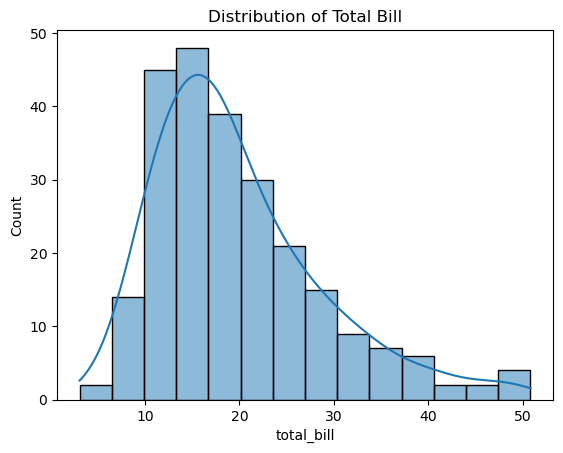

In [25]:
# Visualize the distributions
sns.histplot(df["total_bill"], kde=True)
plt.title("Distribution of Total Bill")
plt.show()

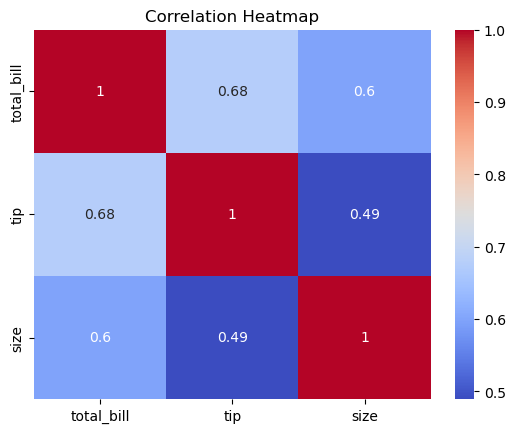

In [26]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()